In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
uploaded= files.upload()

Saving churn_prediction.xlsx to churn_prediction.xlsx


In [ ]:
churnpre_df= pd.read_excel('churn_prediction.xlsx')

In [ ]:
churnpre_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


# **Data Processing**

In [ ]:
churnpre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
churnpre_df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
churnpre_df.duplicated().any()

False

**Check imbalanced data**

In [ ]:
imb_check= churnpre_df.groupby('Churn')['CustomerID'].count().reset_index()
imb_check['imb_rate']=imb_check['CustomerID']*100/sum(imb_check['CustomerID'])
imb_check

,Churn,CustomerID,imb_rate
0,0,4682,83.161634
1,1,948,16.838366


**Handle missing value**

In [ ]:
churnpre_df.median()

<ipython-input-8-07dacb2071f5>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  churnpre_df.median()


CustomerID                     52815.50
Churn                              0.00
Tenure                             9.00
CityTier                           1.00
WarehouseToHome                   14.00
HourSpendOnApp                     3.00
NumberOfDeviceRegistered           4.00
SatisfactionScore                  3.00
NumberOfAddress                    3.00
Complain                           0.00
OrderAmountHikeFromlastYear       15.00
CouponUsed                         1.00
OrderCount                         2.00
DaySinceLastOrder                  3.00
CashbackAmount                   163.28
dtype: float64

In [ ]:
# Replace missing value by 0 or median
values={'Tenure':0,'WarehouseToHome':14,'HourSpendOnApp':3,'OrderAmountHikeFromlastYear':15,'CouponUsed':0,'OrderCount':2,'DaySinceLastOrder':0}
churnprefna_df=churnpre_df.fillna(value=values)

In [ ]:
churnprefna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# ***Feature Engineering & EDA***

<ipython-input-11-e51ed64bef4a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(churnprefna_df.corr(), cmap="YlGnBu", annot=True,fmt=".2f")


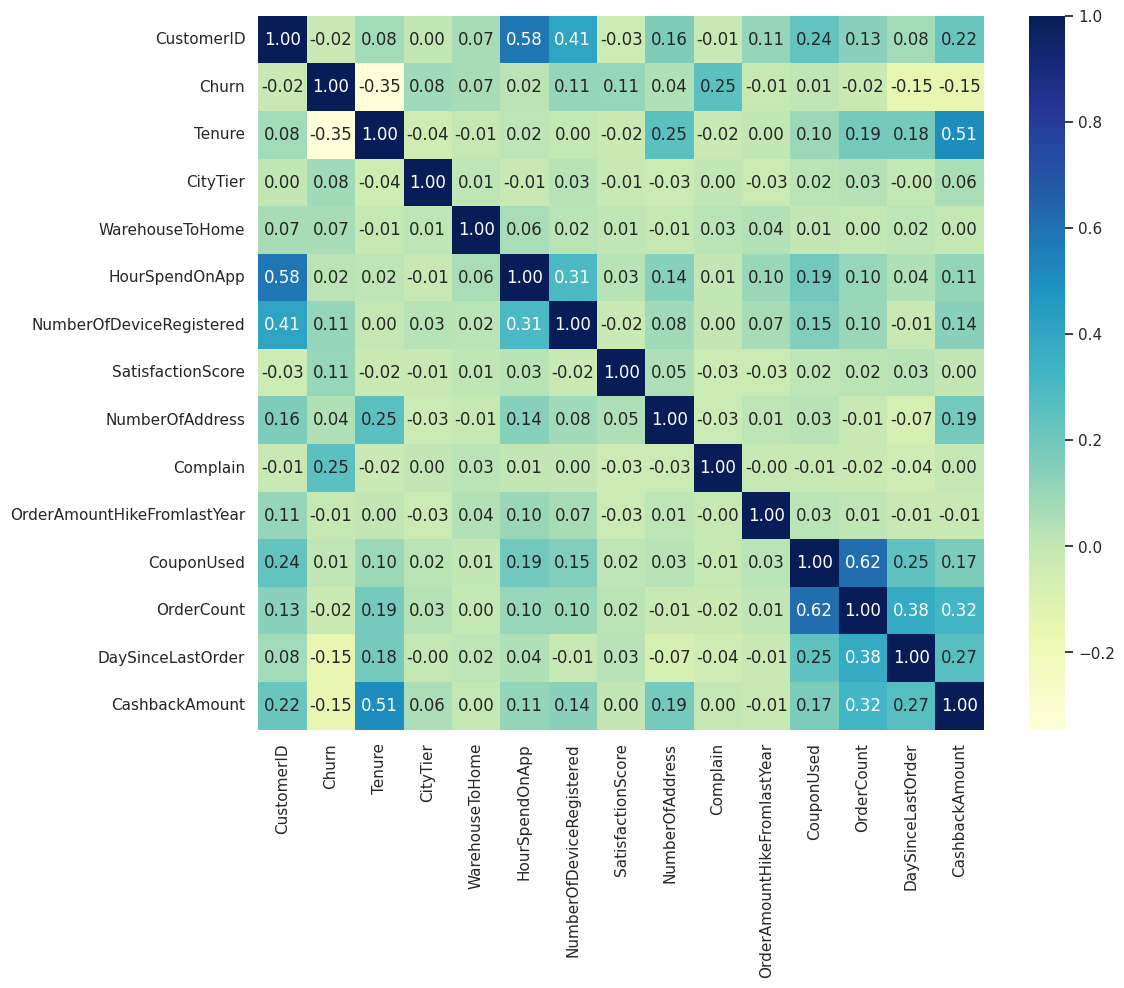

In [ ]:
sns.set(rc={'figure.figsize':(11.7,9.27)})
dataplot = sns.heatmap(churnprefna_df.corr(), cmap="YlGnBu", annot=True,fmt=".2f")

In [ ]:
def count_percentage(df, column, target, count):
    '''
    This function to create the table calculate the percentage of fraud/non-fraud transaction on total transaction group by category values

    Input: df: dataframe
    column: the category column need to be groupby
    target: the target column
    count: the column to count the transactions

    Example:
    df = df_train, column = 'job', target = 'is_fraud', count = 'cc_num'

    '''

    # Create 2 dataframes of churn and non-churn
    churn = df[df[target]==1].groupby(column)[count].count().reset_index().sort_values(ascending=False, by = count)
    not_churn = df[df[target]==0].groupby(column)[count].count().reset_index().sort_values(ascending=False, by = count)

    #Merge 2 dataframe into one:
    cate_df = churn.merge(not_churn, on = column , how = 'outer')
    cate_df = cate_df.fillna(0)
    cate_df.rename(columns = {count+'_x':'churn',count+'_y':'not_churn'}, inplace = True)

    #Caculate the percentage:
    cate_df['% churn'] = cate_df['churn']/(cate_df['churn']+cate_df['not_churn'])
    cate_df['% not_churn'] = cate_df['not_churn']/(cate_df['churn']+cate_df['not_churn'])
    return cate_df

In [ ]:
tenure=count_percentage(churnprefna_df,'Tenure','Churn','CustomerID')
tenure

,Tenure,churn,not_churn,% churn,% not_churn
0,0.0,353.0,419,0.457254,0.542746
1,1.0,349.0,341,0.505797,0.494203
2,4.0,20.0,183,0.098522,0.901478
3,3.0,18.0,177,0.092308,0.907692
4,5.0,16.0,188,0.078431,0.921569
5,20.0,16.0,93,0.146789,0.853211
6,7.0,16.0,205,0.072398,0.927602
7,8.0,16.0,247,0.060837,0.939163
8,2.0,14.0,153,0.083832,0.916168
9,10.0,14.0,199,0.065728,0.934272


<Axes: xlabel='Tenure', ylabel='CustomerID'>

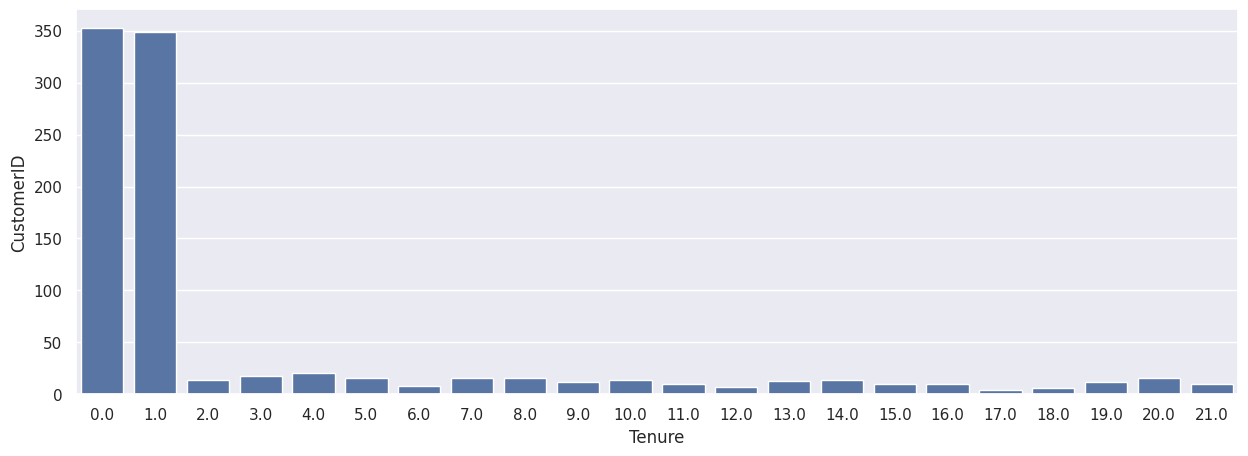

In [ ]:
plot_churn1_df=churnprefna_df[churnprefna_df['Churn']==1].groupby('Tenure')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(data=plot_churn1_df,x='Tenure',y='CustomerID',ax=ax)

<Axes: xlabel='Tenure', ylabel='CustomerID'>

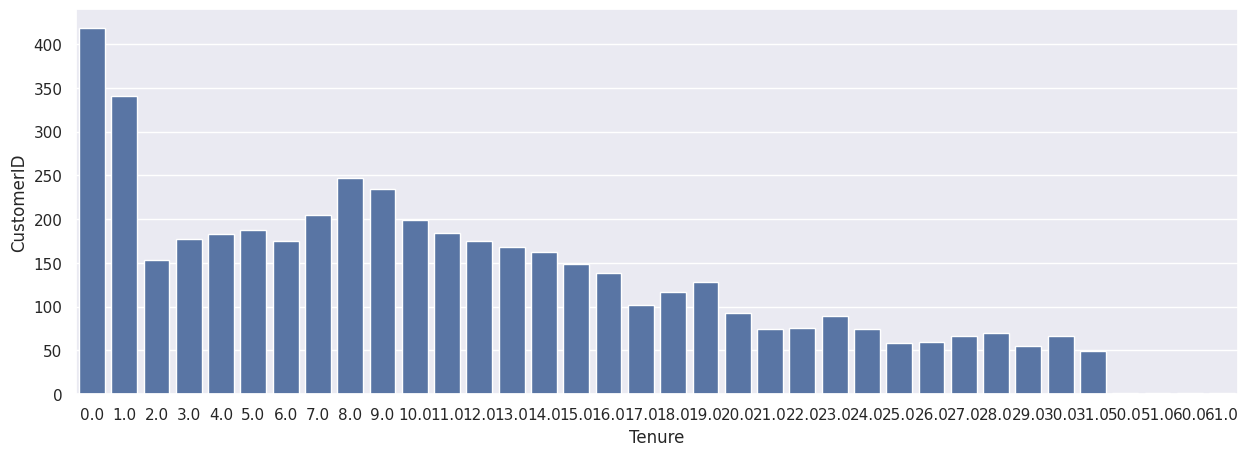

In [ ]:
plot_churn0_df=churnprefna_df[churnprefna_df['Churn']==0].groupby('Tenure')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(data=plot_churn0_df,x='Tenure',y='CustomerID',ax=ax)

In [ ]:
complain=count_percentage(churnprefna_df,'Complain','Churn','CustomerID')
complain

,Complain,churn,not_churn,% churn,% not_churn
0,1,508,1096,0.316708,0.683292
1,0,440,3586,0.109290,0.890710


<Axes: xlabel='Complain', ylabel='CustomerID'>

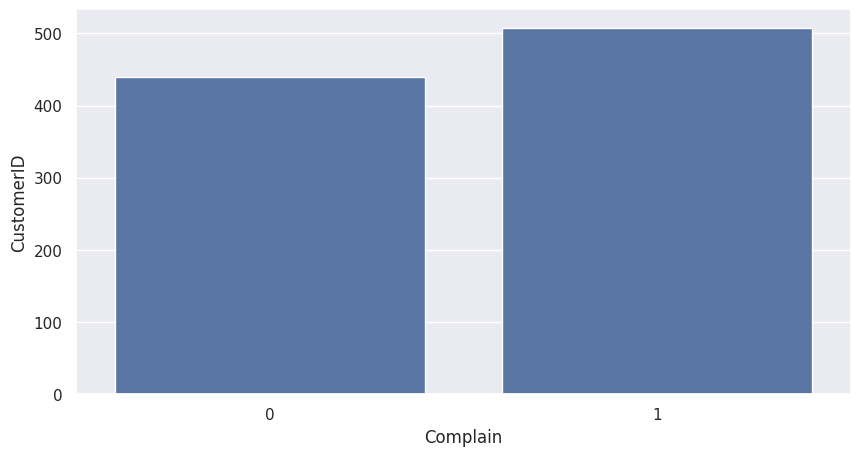

In [ ]:
plot_complain1_df=churnprefna_df[churnprefna_df['Churn']==1].groupby('Complain')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_complain1_df,x='Complain',y='CustomerID',ax=ax)

<Axes: xlabel='Complain', ylabel='CustomerID'>

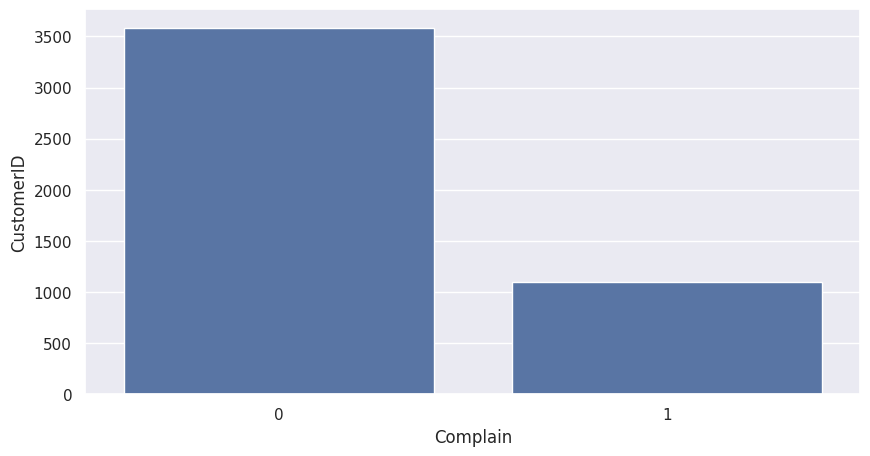

In [ ]:
plot_complain0_df=churnprefna_df[churnprefna_df['Churn']==0].groupby('Complain')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_complain0_df,x='Complain',y='CustomerID',ax=ax)

In [ ]:
SatisfactionScore=count_percentage(churnprefna_df,'SatisfactionScore','Churn','CustomerID')
SatisfactionScore.sort_values(by=['SatisfactionScore'])

,SatisfactionScore,churn,not_churn,% churn,% not_churn
3,1,134,1030,0.115120,0.884880
4,2,74,512,0.126280,0.873720
0,3,292,1406,0.171967,0.828033
2,4,184,890,0.171322,0.828678
1,5,264,844,0.238267,0.761733


In [ ]:
Satis_complain= count_percentage(churnprefna_df,'SatisfactionScore','Complain','CustomerID')
Satis_complain.rename(columns={'churn': 'complain', 'not_churn': 'not_complain','% churn':'% complain','% not_churn':'% not_complain'}).sort_values(by=['SatisfactionScore'])

,SatisfactionScore,complain,not_complain,% complain,% not_complain
1,1,372,792,0.319588,0.680412
4,2,170,416,0.290102,0.709898
0,3,472,1226,0.277974,0.722026
3,4,268,806,0.249534,0.750466
2,5,322,786,0.290614,0.709386


<Axes: xlabel='SatisfactionScore', ylabel='CustomerID'>

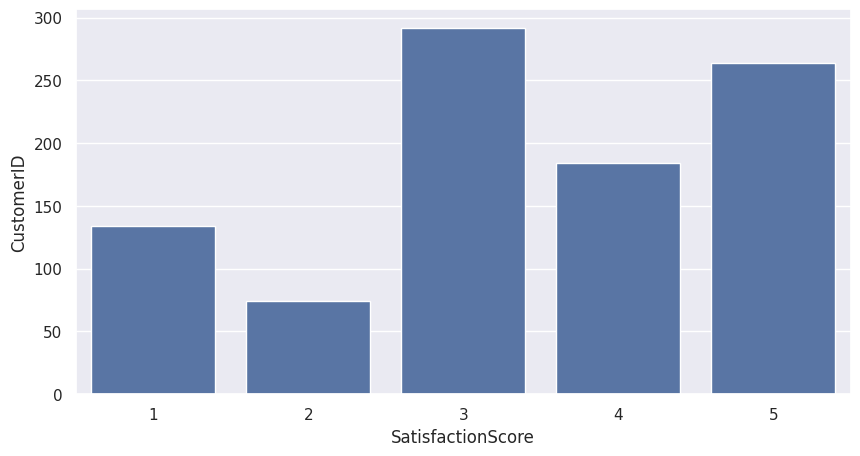

In [ ]:
plot_satscore1_df=churnprefna_df[churnprefna_df['Churn']==1].groupby('SatisfactionScore')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_satscore1_df,x='SatisfactionScore',y='CustomerID',ax=ax)

<Axes: xlabel='SatisfactionScore', ylabel='CustomerID'>

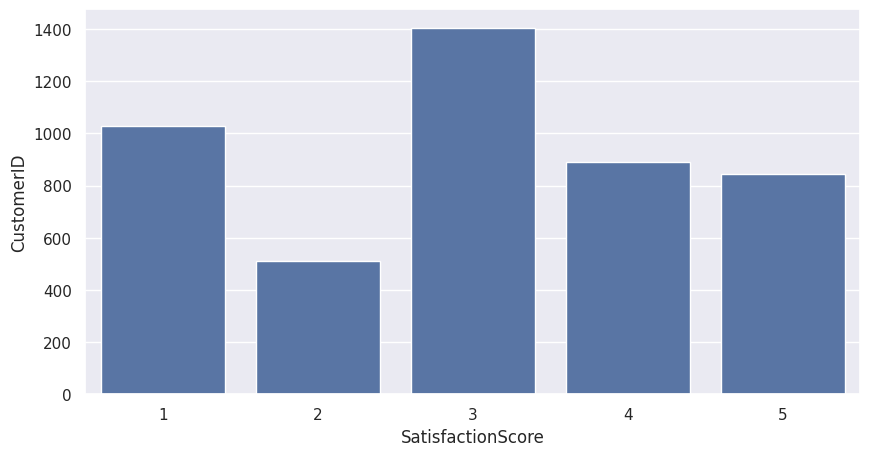

In [ ]:
plot_satscore0_df=churnprefna_df[churnprefna_df['Churn']==0].groupby('SatisfactionScore')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_satscore0_df,x='SatisfactionScore',y='CustomerID',ax=ax)

In [ ]:
WarehouseToHome=count_percentage(churnprefna_df,'WarehouseToHome','Churn','CustomerID')
WarehouseToHome.sort_values(by='WarehouseToHome')

,WarehouseToHome,churn,not_churn,% churn,% not_churn
31,5.0,1.0,7,0.125000,0.875000
7,6.0,34.0,261,0.115254,0.884746
5,7.0,49.0,340,0.125964,0.874036
2,8.0,58.0,386,0.130631,0.869369
1,9.0,80.0,479,0.143113,0.856887
6,10.0,44.0,230,0.160584,0.839416
9,11.0,32.0,201,0.137339,0.862661
10,12.0,30.0,191,0.135747,0.864253
11,13.0,30.0,219,0.120482,0.879518
0,14.0,124.0,426,0.225455,0.774545


In [ ]:
NumberOfAddress=count_percentage(churnprefna_df,'NumberOfAddress','Churn','CustomerID')
NumberOfAddress.sort_values(by='NumberOfAddress')

,NumberOfAddress,churn,not_churn,% churn,% not_churn
8,1,45.0,326.0,0.121294,0.878706
0,2,241.0,1128.0,0.176041,0.823959
1,3,228.0,1050.0,0.178404,0.821596
5,4,65.0,523.0,0.110544,0.889456
2,5,67.0,504.0,0.117338,0.882662
3,6,66.0,316.0,0.172775,0.827225
6,7,64.0,192.0,0.250000,0.750000
4,8,66.0,214.0,0.235714,0.764286
7,9,46.0,193.0,0.192469,0.807531
9,10,35.0,159.0,0.180412,0.819588


In [ ]:
OrderAmountHikeFromlastYear=count_percentage(churnprefna_df,'OrderAmountHikeFromlastYear','Churn','CustomerID')
OrderAmountHikeFromlastYear.sort_values(by='OrderAmountHikeFromlastYear')

,OrderAmountHikeFromlastYear,churn,not_churn,% churn,% not_churn
4,11.0,82,309,0.209719,0.790281
0,12.0,144,584,0.197802,0.802198
1,13.0,128,613,0.172740,0.827260
2,14.0,116,634,0.154667,0.845333
3,15.0,96,711,0.118959,0.881041
5,16.0,64,269,0.192192,0.807808
6,17.0,54,243,0.181818,0.818182
7,18.0,54,267,0.168224,0.831776
8,19.0,44,267,0.141479,0.858521
11,20.0,32,211,0.131687,0.868313


<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='CustomerID'>

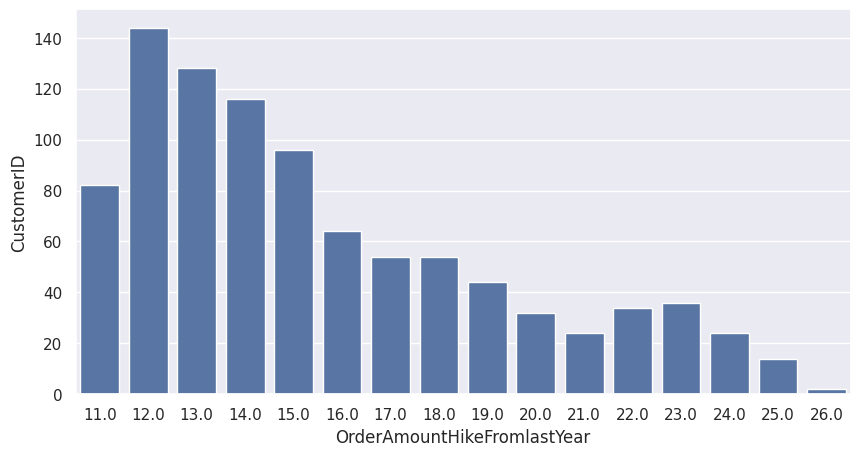

In [ ]:
plot_OAHFLY1_df=churnprefna_df[churnprefna_df['Churn']==1].groupby('OrderAmountHikeFromlastYear')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_OAHFLY1_df,x='OrderAmountHikeFromlastYear',y='CustomerID',ax=ax)

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='CustomerID'>

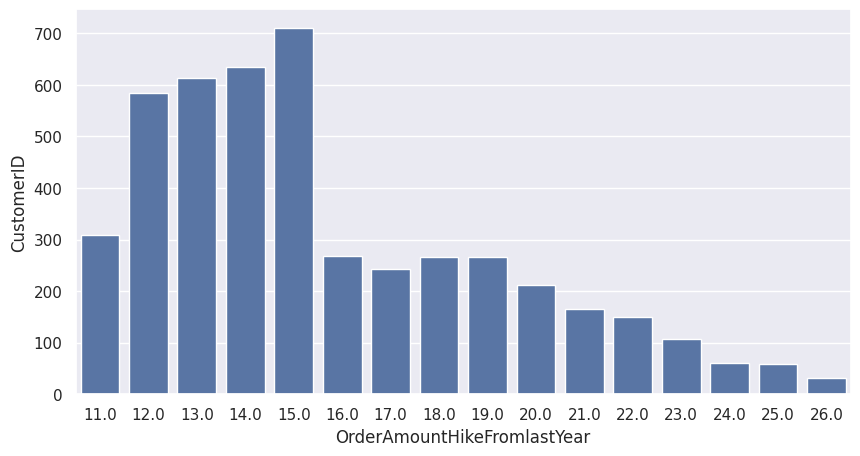

In [ ]:
plot_OAHFLY0_df=churnprefna_df[churnprefna_df['Churn']==0].groupby('OrderAmountHikeFromlastYear')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_OAHFLY0_df,x='OrderAmountHikeFromlastYear',y='CustomerID',ax=ax)

In [ ]:
PreferredLoginDevice=count_percentage(churnprefna_df.replace({'PreferredLoginDevice': {'Phone': 'Mobile Phone'}}),'PreferredLoginDevice','Churn','CustomerID')
PreferredLoginDevice

,PreferredLoginDevice,churn,not_churn,% churn,% not_churn
0,Mobile Phone,624,3372,0.156156,0.843844
1,Computer,324,1310,0.198286,0.801714


In [ ]:
PreferredPaymentMode=count_percentage(churnprefna_df.replace({'PreferredPaymentMode': {'COD': 'Cash on Delivery'}}),'PreferredPaymentMode','Churn','CustomerID')
PreferredPaymentMode

,PreferredPaymentMode,churn,not_churn,% churn,% not_churn
0,Debit Card,356,1958,0.153846,0.846154
1,Credit Card,193,1308,0.128581,0.871419
2,E wallet,140,474,0.228013,0.771987
3,Cash on Delivery,128,386,0.249027,0.750973
4,UPI,72,342,0.173913,0.826087
5,CC,59,214,0.216117,0.783883


In [ ]:
HourSpendOnApp=count_percentage(churnprefna_df,'HourSpendOnApp','Churn','CustomerID')
HourSpendOnApp

,HourSpendOnApp,churn,not_churn,% churn,% not_churn
0,3.0,518.0,2424,0.176071,0.823929
1,2.0,232.0,1239,0.157716,0.842284
2,4.0,198.0,978,0.168367,0.831633
3,1.0,0.0,35,0.000000,1.000000
4,0.0,0.0,3,0.000000,1.000000
5,5.0,0.0,3,0.000000,1.000000


In [ ]:
NumberOfDeviceRegistered=count_percentage(churnprefna_df,'NumberOfDeviceRegistered','Churn','CustomerID')
NumberOfDeviceRegistered

,NumberOfDeviceRegistered,churn,not_churn,% churn,% not_churn
0,4,392,1985,0.164914,0.835086
1,3,254,1445,0.149500,0.850500
2,5,198,683,0.224745,0.775255
3,6,56,106,0.345679,0.654321
4,2,26,250,0.094203,0.905797
5,1,22,213,0.093617,0.906383


<Axes: xlabel='NumberOfDeviceRegistered', ylabel='CustomerID'>

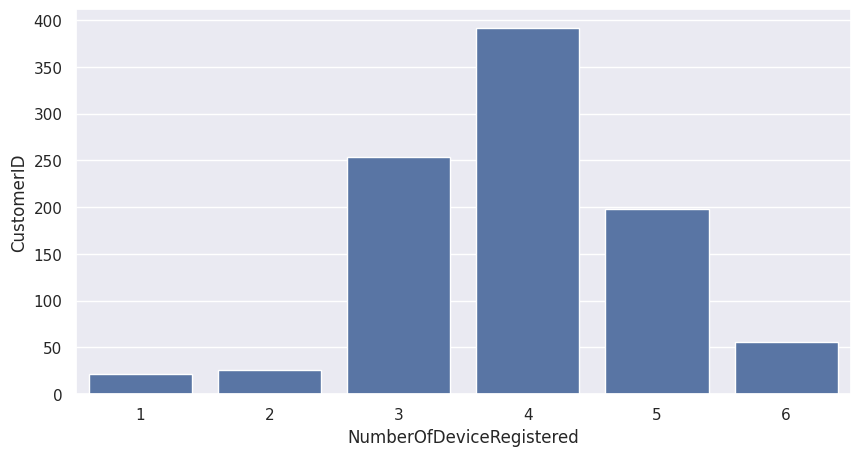

In [ ]:
plot_devreg1_df=churnprefna_df[churnprefna_df['Churn']==1].groupby('NumberOfDeviceRegistered')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_devreg1_df,x='NumberOfDeviceRegistered',y='CustomerID',ax=ax)

<Axes: xlabel='NumberOfDeviceRegistered', ylabel='CustomerID'>

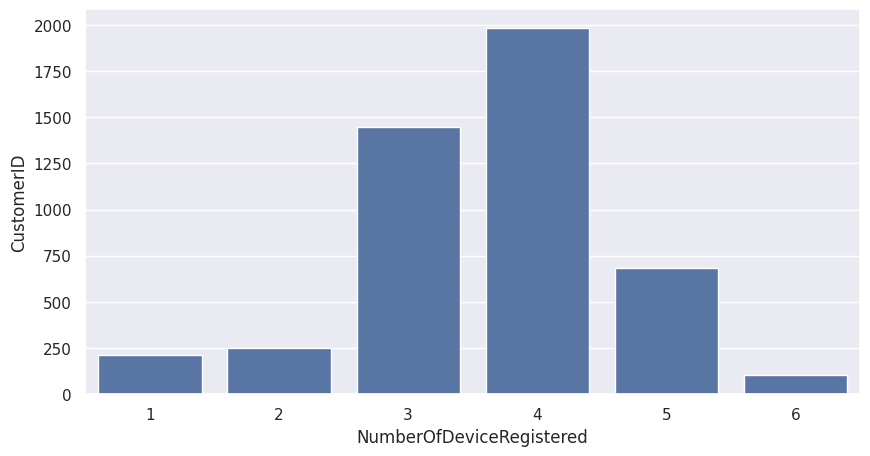

In [ ]:
plot_devreg0_df=churnprefna_df[churnprefna_df['Churn']==0].groupby('NumberOfDeviceRegistered')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_devreg0_df,x='NumberOfDeviceRegistered',y='CustomerID',ax=ax)

In [ ]:
Gender=count_percentage(churnprefna_df,'Gender','Churn','CustomerID')
Gender

,Gender,churn,not_churn,% churn,% not_churn
0,Male,600,2784,0.177305,0.822695
1,Female,348,1898,0.154942,0.845058


In [ ]:
PreferedOrderCat=count_percentage(churnprefna_df.replace({'PreferedOrderCat': {'Mobile': 'Mobile Phone'}}),'PreferedOrderCat','Churn','CustomerID')
PreferedOrderCat

,PreferedOrderCat,churn,not_churn,% churn,% not_churn
0,Mobile Phone,570,1510,0.274038,0.725962
1,Laptop & Accessory,210,1840,0.102439,0.897561
2,Fashion,128,698,0.154964,0.845036
3,Grocery,20,390,0.048780,0.951220
4,Others,20,244,0.075758,0.924242


<Axes: xlabel='PreferedOrderCat', ylabel='CustomerID'>

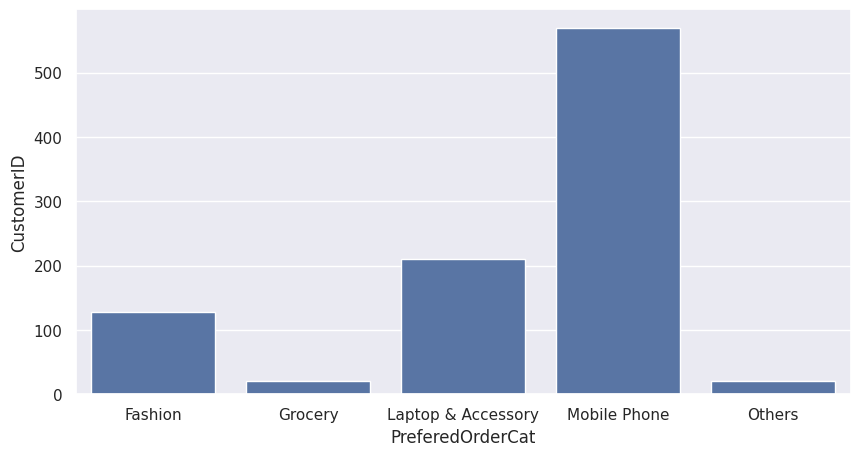

In [ ]:
plot_preordcat1_df=churnprefna_df.replace({'PreferedOrderCat': {'Mobile': 'Mobile Phone'}})[churnprefna_df['Churn']==1].groupby('PreferedOrderCat')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_preordcat1_df,x='PreferedOrderCat',y='CustomerID',ax=ax)

<Axes: xlabel='PreferedOrderCat', ylabel='CustomerID'>

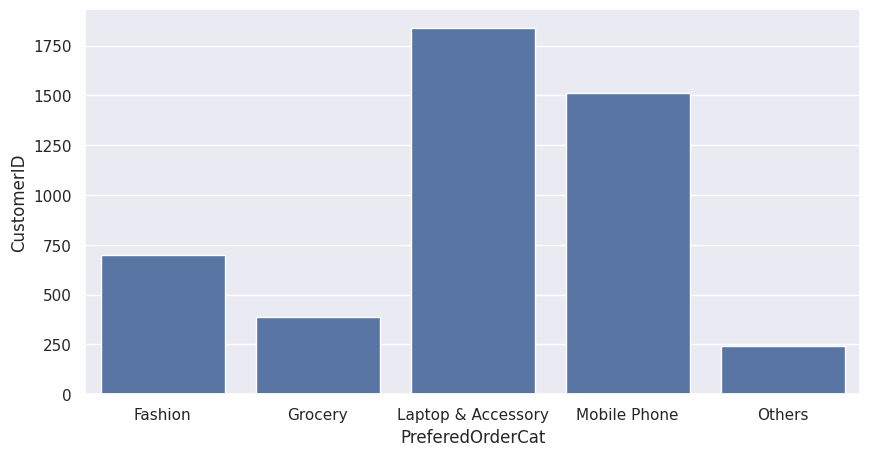

In [ ]:
plot_preordcat0_df=churnprefna_df.replace({'PreferedOrderCat': {'Mobile': 'Mobile Phone'}})[churnprefna_df['Churn']==0].groupby('PreferedOrderCat')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_preordcat0_df,x='PreferedOrderCat',y='CustomerID',ax=ax)

In [ ]:
CityTier=count_percentage(churnprefna_df,'CityTier','Churn','CustomerID')
CityTier

,CityTier,churn,not_churn,% churn,% not_churn
0,1,532,3134,0.145117,0.854883
1,3,368,1354,0.213705,0.786295
2,2,48,194,0.198347,0.801653


In [ ]:
MaritalStatus=count_percentage(churnprefna_df,'MaritalStatus','Churn','CustomerID')
MaritalStatus

,MaritalStatus,churn,not_churn,% churn,% not_churn
0,Single,480,1316,0.267261,0.732739
1,Married,344,2642,0.115204,0.884796
2,Divorced,124,724,0.146226,0.853774


<Axes: xlabel='MaritalStatus', ylabel='CustomerID'>

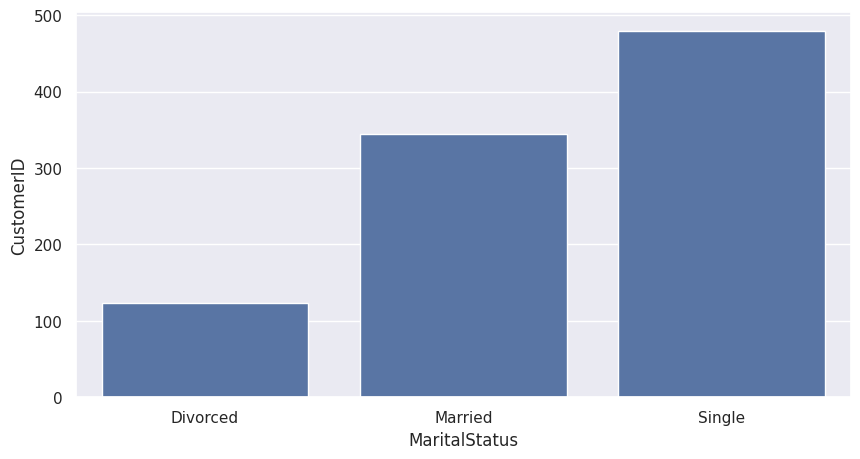

In [ ]:
plot_marista1_df=churnprefna_df[churnprefna_df['Churn']==1].groupby('MaritalStatus')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_marista1_df,x='MaritalStatus',y='CustomerID',ax=ax)

<Axes: xlabel='MaritalStatus', ylabel='CustomerID'>

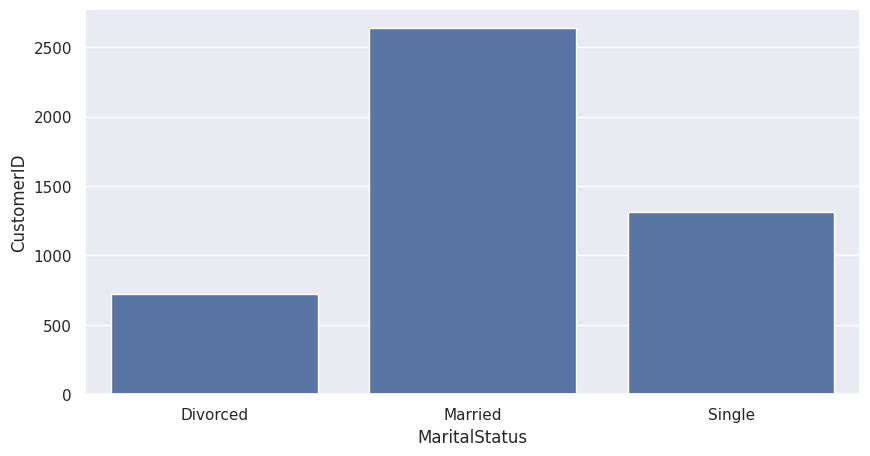

In [ ]:
plot_marista0_df=churnprefna_df[churnprefna_df['Churn']==0].groupby('MaritalStatus')['CustomerID'].nunique().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=plot_marista0_df,x='MaritalStatus',y='CustomerID',ax=ax)

In [ ]:
MaritalStatus=count_percentage(churnprefna_df,'MaritalStatus','Churn','CustomerID')
MaritalStatus

,MaritalStatus,churn,not_churn,% churn,% not_churn
0,Single,480,1316,0.267261,0.732739
1,Married,344,2642,0.115204,0.884796
2,Divorced,124,724,0.146226,0.853774


In [ ]:
OrderCount=count_percentage(churnprefna_df,'OrderCount','Churn','CustomerID')
OrderCount.sort_values(by='OrderCount')

,OrderCount,churn,not_churn,% churn,% not_churn
1,1.0,316,1435,0.180468,0.819532
0,2.0,388,1895,0.169952,0.830048
2,3.0,68,303,0.183288,0.816712
5,4.0,28,176,0.137255,0.862745
7,5.0,14,167,0.077348,0.922652
6,6.0,16,121,0.116788,0.883212
3,7.0,42,164,0.203883,0.796117
4,8.0,32,140,0.186047,0.813953
8,9.0,8,54,0.129032,0.870968
9,10.0,8,28,0.222222,0.777778


In [ ]:
DaySinceLastOrder=count_percentage(churnprefna_df,'DaySinceLastOrder','Churn','CustomerID')
DaySinceLastOrder

,DaySinceLastOrder,churn,not_churn,% churn,% not_churn
0,0.0,224.0,579.0,0.278954,0.721046
1,1.0,182.0,432.0,0.296417,0.703583
2,3.0,130.0,770.0,0.144444,0.855556
3,2.0,122.0,670.0,0.154040,0.845960
4,8.0,66.0,472.0,0.122677,0.877323
5,7.0,65.0,382.0,0.145414,0.854586
6,4.0,58.0,373.0,0.134571,0.865429
7,5.0,28.0,200.0,0.122807,0.877193
8,9.0,28.0,271.0,0.093645,0.906355
9,6.0,16.0,97.0,0.141593,0.858407


In [ ]:
CashbackAmount=count_percentage(churnprefna_df,'CashbackAmount','Churn','CustomerID')
CashbackAmount.sort_values(by='CashbackAmount')

,CashbackAmount,churn,not_churn,% churn,% not_churn
492,0.00,0.0,4.0,0.0,1.0
2430,12.00,0.0,1.0,0.0,1.0
621,25.00,0.0,4.0,0.0,1.0
2451,37.00,0.0,1.0,0.0,1.0
2450,56.00,0.0,1.0,0.0,1.0
...,...,...,...,...,...
465,323.59,2.0,0.0,1.0,0.0
949,324.26,0.0,2.0,0.0,1.0
950,324.43,0.0,2.0,0.0,1.0
951,324.73,0.0,2.0,0.0,1.0


<Axes: title={'center': 'CashbackAmount'}, xlabel='Churn'>

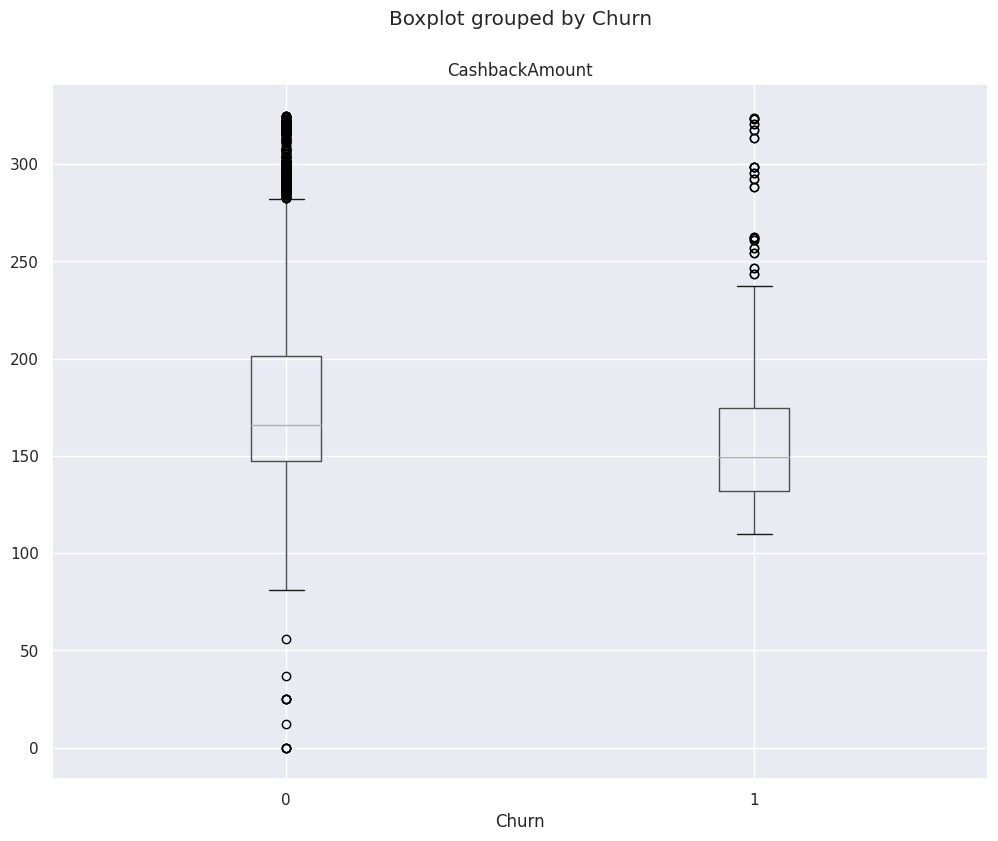

In [ ]:
churnprefna_df.boxplot(column='CashbackAmount',by='Churn')

**Question 1: What are the patterns/behavior of churned users? What are your suggestions to the company to reduce churned users.**

*The behavior of churned users*
- The new customer who have transaction after creating account 0-1 day is ability to churn
- People who have a complaint
- Customers who buy mobile phones tend to churn
- The higher the City Tier, the lower the churn level
- The more accounts a customer registers, the more likely it is to churn
- The closer the customer's last order date gets, the higher the churn rate
- People who are single are more likely to churn than married status
- The less cashback customer receive, the higher churn rate

*There are some solutions*
- Sending emails, reminding customers about upcoming promotions and offering special discount to new customer
- Building a complaint handling process, receive, find the cause and resolve complaints
- With people who complained => Reaching out them to get their feedbacks, identify and analyze common complaints, fix underlying problems and offer solution as well as offer them voucher
- Offer customer other products for cross sell or up sell customer

In [ ]:
churnpredf_model= churnprefna_df[['Churn','Tenure','Complain', 'DaySinceLastOrder','MaritalStatus','NumberOfDeviceRegistered','CityTier','CashbackAmount','WarehouseToHome','OrderAmountHikeFromlastYear','NumberOfAddress','SatisfactionScore','CouponUsed','OrderCount','PreferedOrderCat']]
churnpredf_model

,Churn,Tenure,Complain,DaySinceLastOrder,MaritalStatus,NumberOfDeviceRegistered,CityTier,CashbackAmount,WarehouseToHome,OrderAmountHikeFromlastYear,NumberOfAddress,SatisfactionScore,CouponUsed,OrderCount,PreferedOrderCat
0,1,4.0,1,5.0,Single,3,3,159.93,6.0,11.0,9,2,1.0,1.0,Laptop & Accessory
1,1,0.0,1,0.0,Single,4,1,120.90,8.0,15.0,7,3,0.0,1.0,Mobile
2,1,0.0,1,3.0,Single,4,1,120.28,30.0,14.0,6,3,0.0,1.0,Mobile
3,1,0.0,0,3.0,Single,4,3,134.07,15.0,23.0,8,5,0.0,1.0,Laptop & Accessory
4,1,0.0,0,3.0,Single,3,1,129.60,12.0,11.0,3,5,1.0,1.0,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,0,4.0,Married,2,1,150.71,30.0,18.0,6,1,1.0,2.0,Laptop & Accessory
5626,0,13.0,0,0.0,Married,5,1,224.91,13.0,16.0,6,5,1.0,2.0,Fashion
5627,0,1.0,1,4.0,Married,2,1,186.42,11.0,21.0,3,4,1.0,2.0,Laptop & Accessory
5628,0,23.0,0,9.0,Married,5,3,178.90,9.0,15.0,4,4,2.0,2.0,Laptop & Accessory


# **Feature transforming: Encoding & Nomalization**



In [ ]:
#Encoding cho logistic regression
list_columns = ['MaritalStatus','Complain','CityTier','PreferedOrderCat','SatisfactionScore','NumberOfDeviceRegistered']
churnpredf_model = pd.get_dummies(churnpredf_model, columns = list_columns)

In [ ]:
churnpredf_model

,Churn,Tenure,DaySinceLastOrder,CashbackAmount,WarehouseToHome,OrderAmountHikeFromlastYear,NumberOfAddress,CouponUsed,OrderCount,MaritalStatus_Divorced,...,SatisfactionScore_2,SatisfactionScore_3,SatisfactionScore_4,SatisfactionScore_5,NumberOfDeviceRegistered_1,NumberOfDeviceRegistered_2,NumberOfDeviceRegistered_3,NumberOfDeviceRegistered_4,NumberOfDeviceRegistered_5,NumberOfDeviceRegistered_6
0,1,4.0,5.0,159.93,6.0,11.0,9,1.0,1.0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0.0,0.0,120.90,8.0,15.0,7,0.0,1.0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0.0,3.0,120.28,30.0,14.0,6,0.0,1.0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0.0,3.0,134.07,15.0,23.0,8,0.0,1.0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0.0,3.0,129.60,12.0,11.0,3,1.0,1.0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,4.0,150.71,30.0,18.0,6,1.0,2.0,0,...,0,0,0,0,0,1,0,0,0,0
5626,0,13.0,0.0,224.91,13.0,16.0,6,1.0,2.0,0,...,0,0,0,1,0,0,0,0,1,0
5627,0,1.0,4.0,186.42,11.0,21.0,3,1.0,2.0,0,...,0,0,1,0,0,1,0,0,0,0
5628,0,23.0,9.0,178.90,9.0,15.0,4,2.0,2.0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
#Encoding cho random forest
list_columns_rfdt = ['MaritalStatus','PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','CustomerID']
churnpredf_model_rfdt = pd.get_dummies(churnprefna_df, columns = list_columns_rfdt)

In [ ]:
churnpredf_model_rfdt

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,CustomerID_55621,CustomerID_55622,CustomerID_55623,CustomerID_55624,CustomerID_55625,CustomerID_55626,CustomerID_55627,CustomerID_55628,CustomerID_55629,CustomerID_55630
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,1,8.0,3.0,4,3,7,1,15.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,1,30.0,2.0,4,3,6,1,14.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,3.0,2,1,6,0,18.0,...,0,0,0,0,0,1,0,0,0,0
5626,0,13.0,1,13.0,3.0,5,5,6,0,16.0,...,0,0,0,0,0,0,1,0,0,0
5627,0,1.0,1,11.0,3.0,2,4,3,1,21.0,...,0,0,0,0,0,0,0,1,0,0
5628,0,23.0,3,9.0,4.0,5,4,4,0,15.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Nomalization cho logistic regression
list_columns = churnpredf_model.columns.tolist()

from sklearn.preprocessing import MinMaxScaler

filter_df = churnpredf_model[list_columns]
scaler = MinMaxScaler()
model=scaler.fit(filter_df)
scaled_data=model.transform(filter_df)

churnpredf_model = pd.DataFrame(scaled_data, columns = list_columns)

In [ ]:
churnpredf_model

,Churn,Tenure,DaySinceLastOrder,CashbackAmount,WarehouseToHome,OrderAmountHikeFromlastYear,NumberOfAddress,CouponUsed,OrderCount,MaritalStatus_Divorced,...,SatisfactionScore_2,SatisfactionScore_3,SatisfactionScore_4,SatisfactionScore_5,NumberOfDeviceRegistered_1,NumberOfDeviceRegistered_2,NumberOfDeviceRegistered_3,NumberOfDeviceRegistered_4,NumberOfDeviceRegistered_5,NumberOfDeviceRegistered_6
0,1.0,0.065574,0.108696,0.492107,0.008197,0.000000,0.380952,0.0625,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.000000,0.000000,0.372011,0.024590,0.266667,0.285714,0.0000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.000000,0.065217,0.370104,0.204918,0.200000,0.238095,0.0000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.000000,0.065217,0.412536,0.081967,0.800000,0.333333,0.0000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.000000,0.065217,0.398782,0.057377,0.000000,0.095238,0.0625,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.163934,0.086957,0.463737,0.204918,0.466667,0.238095,0.0625,0.066667,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5626,0.0,0.213115,0.000000,0.692052,0.065574,0.333333,0.238095,0.0625,0.066667,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.0,0.016393,0.086957,0.573618,0.049180,0.666667,0.095238,0.0625,0.066667,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5628,0.0,0.377049,0.195652,0.550478,0.032787,0.266667,0.142857,0.1250,0.066667,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Nomalization cho random forest
list_columns_rfdt = churnpredf_model_rfdt.columns.tolist()

filter_df = churnpredf_model_rfdt[list_columns_rfdt]
scaler = MinMaxScaler()
model=scaler.fit(filter_df)
scaled_data=model.transform(filter_df)

churnpredf_model_rfdt = pd.DataFrame(scaled_data, columns = list_columns_rfdt)

In [ ]:
churnpredf_model_rfdt

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,CustomerID_55621,CustomerID_55622,CustomerID_55623,CustomerID_55624,CustomerID_55625,CustomerID_55626,CustomerID_55627,CustomerID_55628,CustomerID_55629,CustomerID_55630
0,1.0,0.065574,1.0,0.008197,0.6,0.4,0.25,0.380952,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.000000,0.0,0.024590,0.6,0.6,0.50,0.285714,1.0,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.000000,0.0,0.204918,0.4,0.6,0.50,0.238095,1.0,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.000000,1.0,0.081967,0.4,0.6,1.00,0.333333,0.0,0.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.000000,0.0,0.057377,0.6,0.4,1.00,0.095238,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.163934,0.0,0.204918,0.6,0.2,0.00,0.238095,0.0,0.466667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5626,0.0,0.213115,0.0,0.065574,0.6,0.8,1.00,0.238095,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5627,0.0,0.016393,0.0,0.049180,0.6,0.2,0.75,0.095238,1.0,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5628,0.0,0.377049,1.0,0.032787,0.8,0.8,0.75,0.142857,0.0,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Model Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
x=churnpredf_model_rfdt.drop('Churn', axis = 1)
y=churnpredf_model_rfdt['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
rf = RandomForestClassifier(bootstrap= False,max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators=100,random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, random_state=0)

In [ ]:
y_pred_test= rf.predict(x_test)
y_pred_train= rf.predict(x_train)

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)
print(balanced_accuracy_train,balanced_accuracy_test)

1.0 0.8211109682396811


In [ ]:
feats = {}  # a dict to hold feature name: feature importance
for feature, importance in zip(x_test.columns, rf.feature_importances_):
    feats[feature] = importance  # add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0:'Gini-importance'})
importances = importances.sort_values (by='Gini-importance', ascending=True)
importances = importances. reset_index()

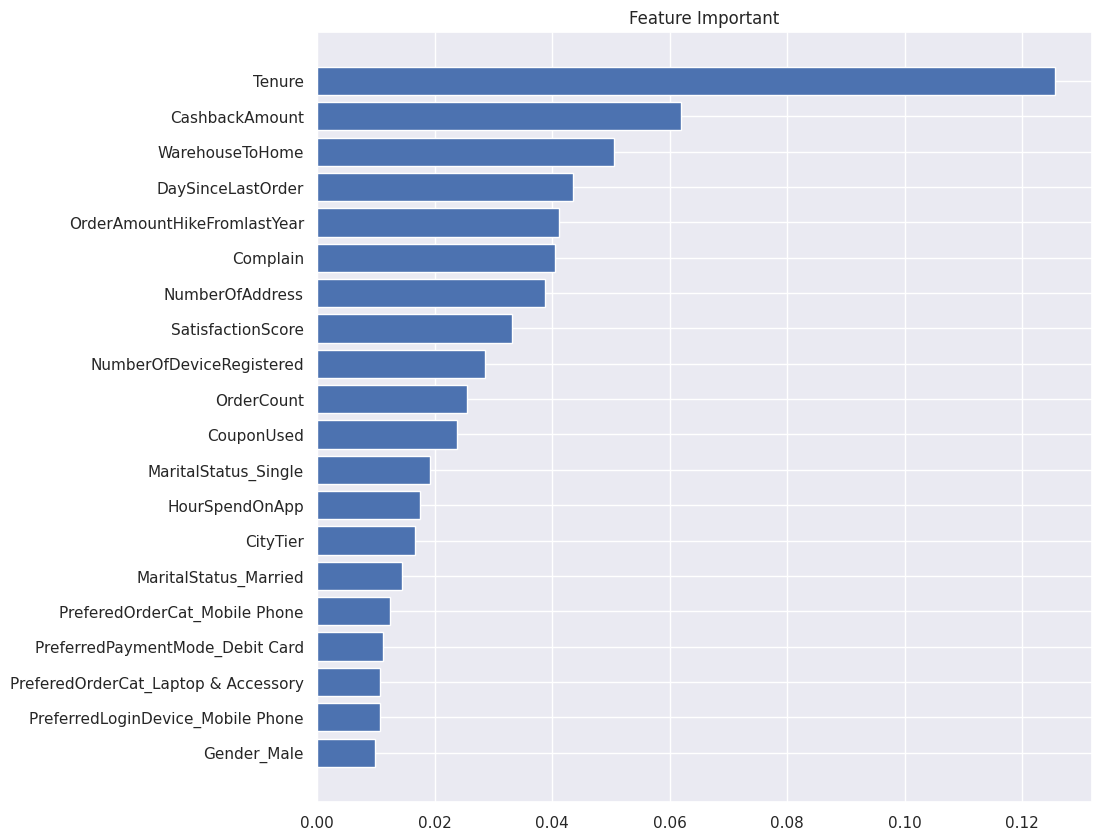

In [ ]:
# Create bar chart
plt.figure(figsize=(10,10))
plt.barh(importances.tail(20) ['index'] [:20],importances.tail(20) ['Gini-importance'])
plt.title('Feature Important')

plt.show()

# **Hyperparameter Tuning**

In [ ]:
#Hyperparameter Tuning of Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {
     'n_estimators':[10, 50, 100, 200],
     'max_depth': [None, 10, 20, 30],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf':[1,2,4],
     'bootstrap': [True, False]}
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='balanced_accuracy')
#Fit the model
grid_search.fit(x_train, y_train)
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
accuracy = best_rf.score(x_test, y_test)
print("Test set accuracy:",accuracy)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test set accuracy: 0.9354647720544701


# **Model Logistic Regression**

In [ ]:
x=churnpredf_model.drop('Churn', axis = 1)
y=churnpredf_model['Churn']

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logis = LogisticRegression(class_weight=None,random_state = 0)
logis.fit(x_train1, y_train1)

LogisticRegression(random_state=0)

In [ ]:
y_pred_test1= logis.predict(x_test1)
y_pred_train1= logis.predict(x_train1)

In [ ]:
balanced_accuracy_train = balanced_accuracy_score(y_train1, y_pred_train1)
balanced_accuracy_test = balanced_accuracy_score(y_test1, y_pred_test1)
print(balanced_accuracy_train,balanced_accuracy_test)

0.7257634479785975 0.7187861643307187
